## UVOD U ZNANOST O PODACIMA ###

### Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models ###

Mia Bošnjak
0036526611

# Priprema i vizualizacija podataka # 


In [96]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Učitavanje podataka

In [97]:
df = pd.read_csv("oasis_longitudinal.csv")

Značajke:
1. SUbject ID - identifikacija
2. MRI ID - pregled identifikacija MRI-ijeva
3. Group - klasa (dementan/nedementan)
4. Visit - redoslijed posjeta
5. MR Delay 
6. Hand - lijevoruk/desnoruk
7. Age - godine startosti
8. EDUC - godina obrazovanja
9. Sex - spol
10. SES - socioekonomski status (1-5)
11. MMSE - pregled mentalnog stanja 
12. CDR - klinička ocjena demencije
13. eTIV - Procijenjeni ukupni intrakranijalni volumen
14. nWBV - normalizirani volumen cijelog mozga
15. ASF - faktor skaliranja



### Prikaz tipova podataka

In [98]:
df.shape

(373, 15)

In [99]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [100]:
df.columns.values

array(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F',
       'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype=object)

In [101]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [102]:
df.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [104]:
print(f"Sex unique values: {df['M/F'].unique()}")
print(f"MMSE unique values: {df['MMSE'].unique()}")
print(f"SES unique values: {df['SES'].unique()}")
print(f"Visit unique values: {df.Visit.unique()}")

Sex unique values: ['M' 'F']
MMSE unique values: [27. 30. 23. 28. 22. 29. 24. 21. 16. 25. 26. 15. 20. 19.  7.  4. 17. 18.
 nan]
SES unique values: [ 2. nan  3.  4.  1.  5.]
Visit unique values: [1 2 3 4 5]


U data setu imamo nekonzintenstne podatke što je primjetno kod socio-ekonomskog statusa i MMSE značajke gdje postoje nedostajući podaci.

## Nedostajući podaci

In [105]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Za slučaj SES značajki uzet ćemo median vrijednost umjesto nedostajućih jer su podaci numerički. 

Dok će za značajku MMSE nedostajuće vrijednosti biti izbačene jer ih nema mnogo.  

In [106]:
df_tmp = df.copy()

df_tmp.loc[df_tmp['SES'].isna(), 'SES'] = df_tmp.loc[:, 'SES'].median()
df_tmp = df_tmp.loc[df_tmp['MMSE'].notnull(), :]

df_tmp.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [107]:
df_tmp.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.878706,593.876011,77.018868,14.611860,2.439353,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.923480,636.636500,7.660864,2.877737,1.111835,3.683244,0.371912,174.990473,0.037229,0.136533
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,2.000000,869.500000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Nekonzistentni podaci

Provjera konzistenstnosti značajki MMSE i SES nakon sređivanja nedostajućih vrijednosti.

In [108]:
print(f"SES unique values: {df_tmp['SES'].unique()}")
print(f"MMSE unique values: {df_tmp.MMSE.unique()}")

SES unique values: [2. 3. 4. 1. 5.]
MMSE unique values: [27. 30. 23. 28. 22. 29. 24. 21. 16. 25. 26. 15. 20. 19.  7.  4. 17. 18.]


## Stršće vrijednosti

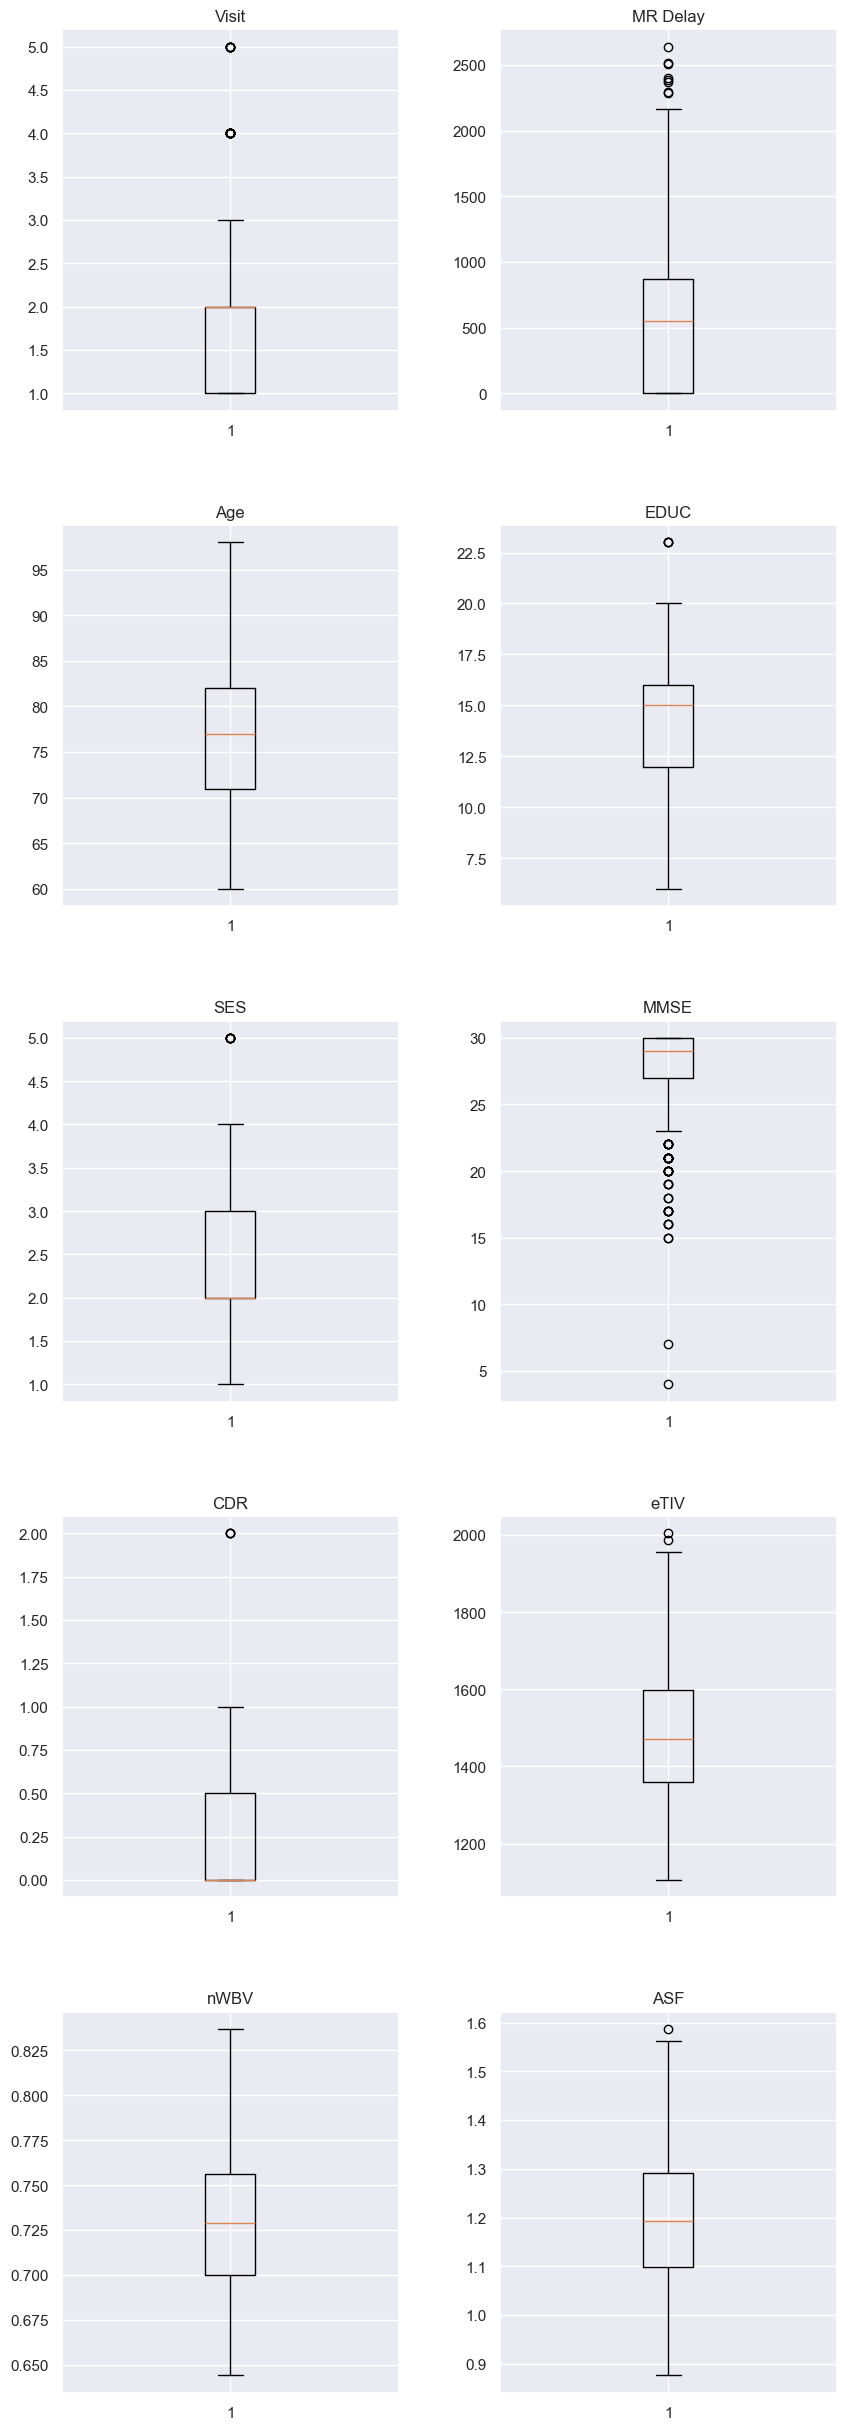

In [109]:
fig = plt.figure(figsize=(10,50))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

k = 0
for feature in df_tmp.loc[:, ~df_tmp.columns.isin(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'])]:
    ax = fig.add_subplot(8, 2, k+1)
    k = k+1
    plt.boxplot(df_tmp[feature])
    plt.title(feature)

## Mijenjanje formata

Značajke 'Subject ID', 'MRI ID', 'Group', 'M/F' i 'Hand' nisu numeričke stoga su u nastavku pretvorene u broj radi lakše manipulacije s istima.

In [110]:
le = LabelEncoder()

le.fit(df_tmp.loc[:,'Subject ID'])
df_tmp.loc[:,'Subject ID'] = le.transform(df_tmp.loc[:,'Subject ID'])

le.fit(df_tmp.loc[:,'MRI ID'])
df_tmp.loc[:,'MRI ID'] = le.transform(df_tmp.loc[:,'MRI ID'])

le.fit(df_tmp.loc[:,'Group'])
df_tmp.loc[:,'Group'] = le.transform(df_tmp.loc[:,'Group'])

le.fit(df_tmp.loc[:,'M/F'])
df_tmp.loc[:,'M/F'] = le.transform(df_tmp.loc[:,'M/F'])

le.fit(df_tmp.loc[:,'Hand'])
df_tmp.loc[:,'Hand'] = le.transform(df_tmp.loc[:,'Hand'])



## Vizualizacija podataka

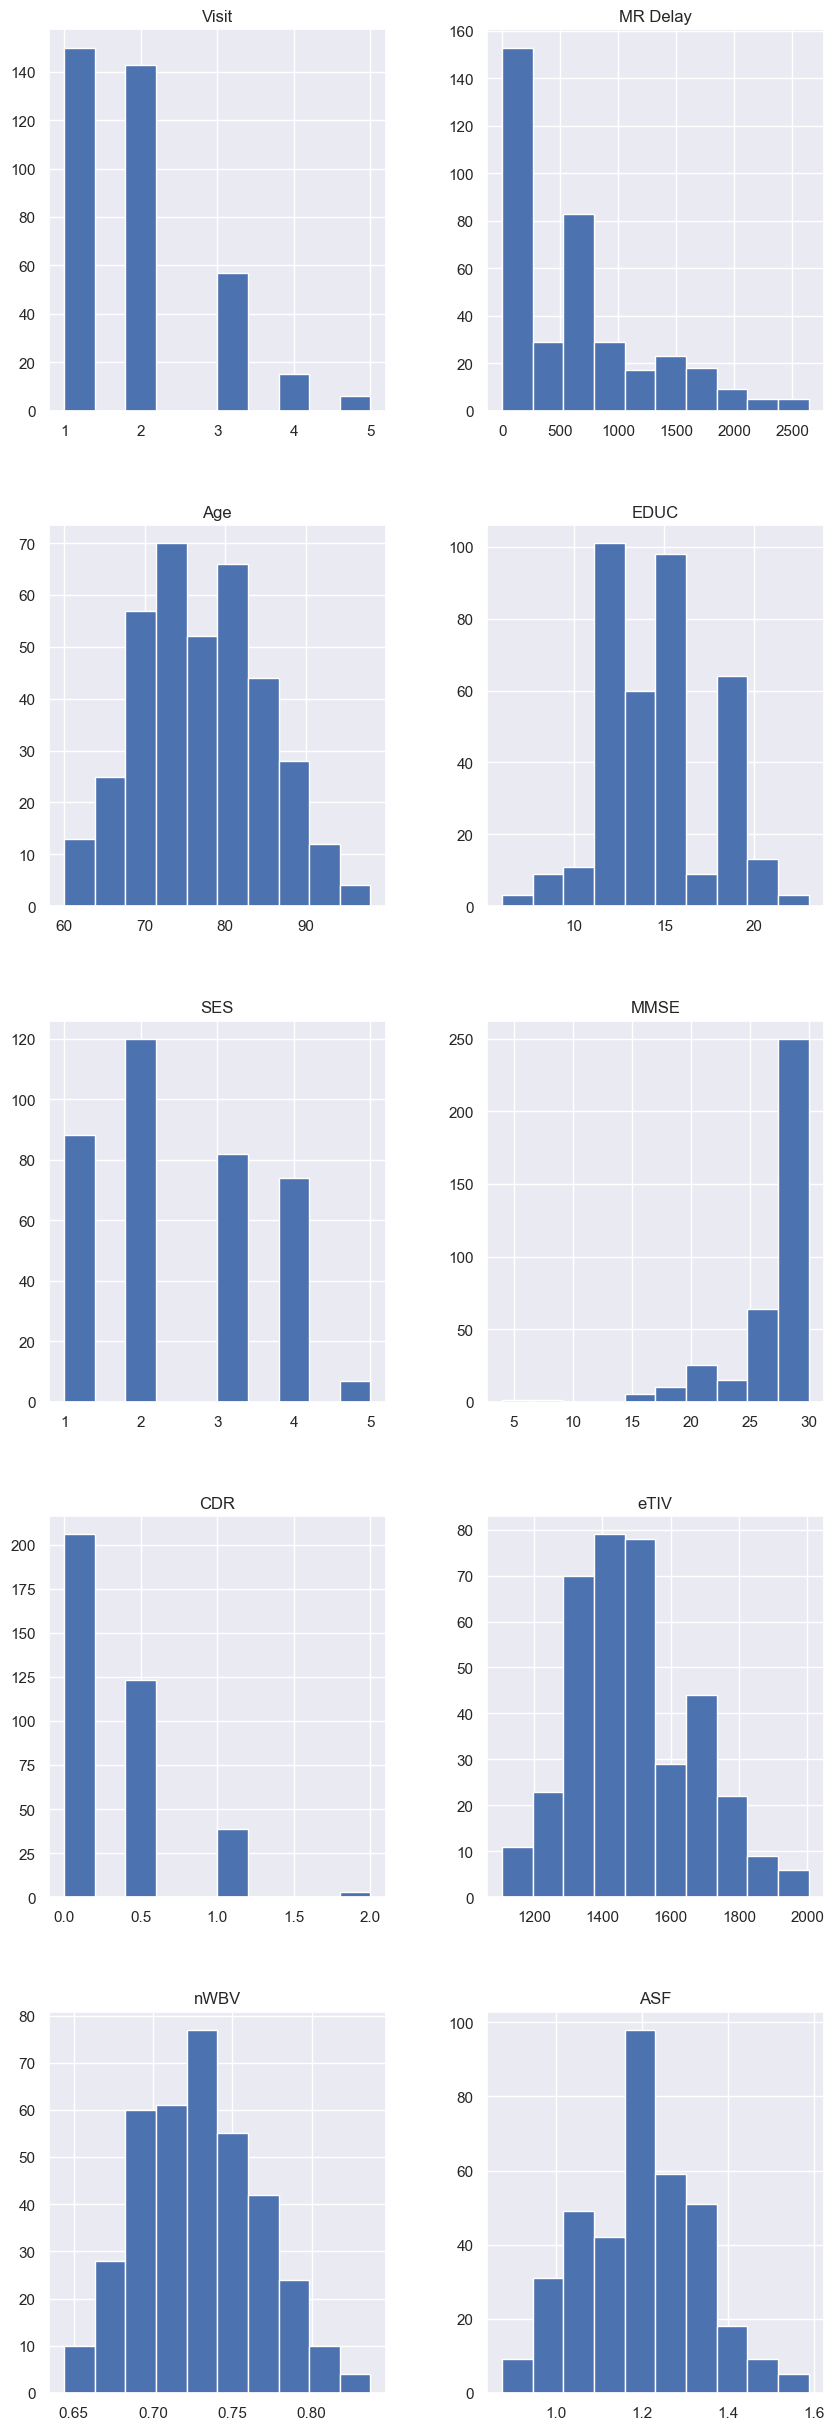

In [111]:
fig = plt.figure(figsize=(10,50))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

k = 0
for feature in df_tmp.loc[:, ~df_tmp.columns.isin(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'])]:
    ax = fig.add_subplot(8, 2, k+1)
    k = k+1
    plt.hist(df_tmp[feature])
    plt.title(feature)
plt.show()

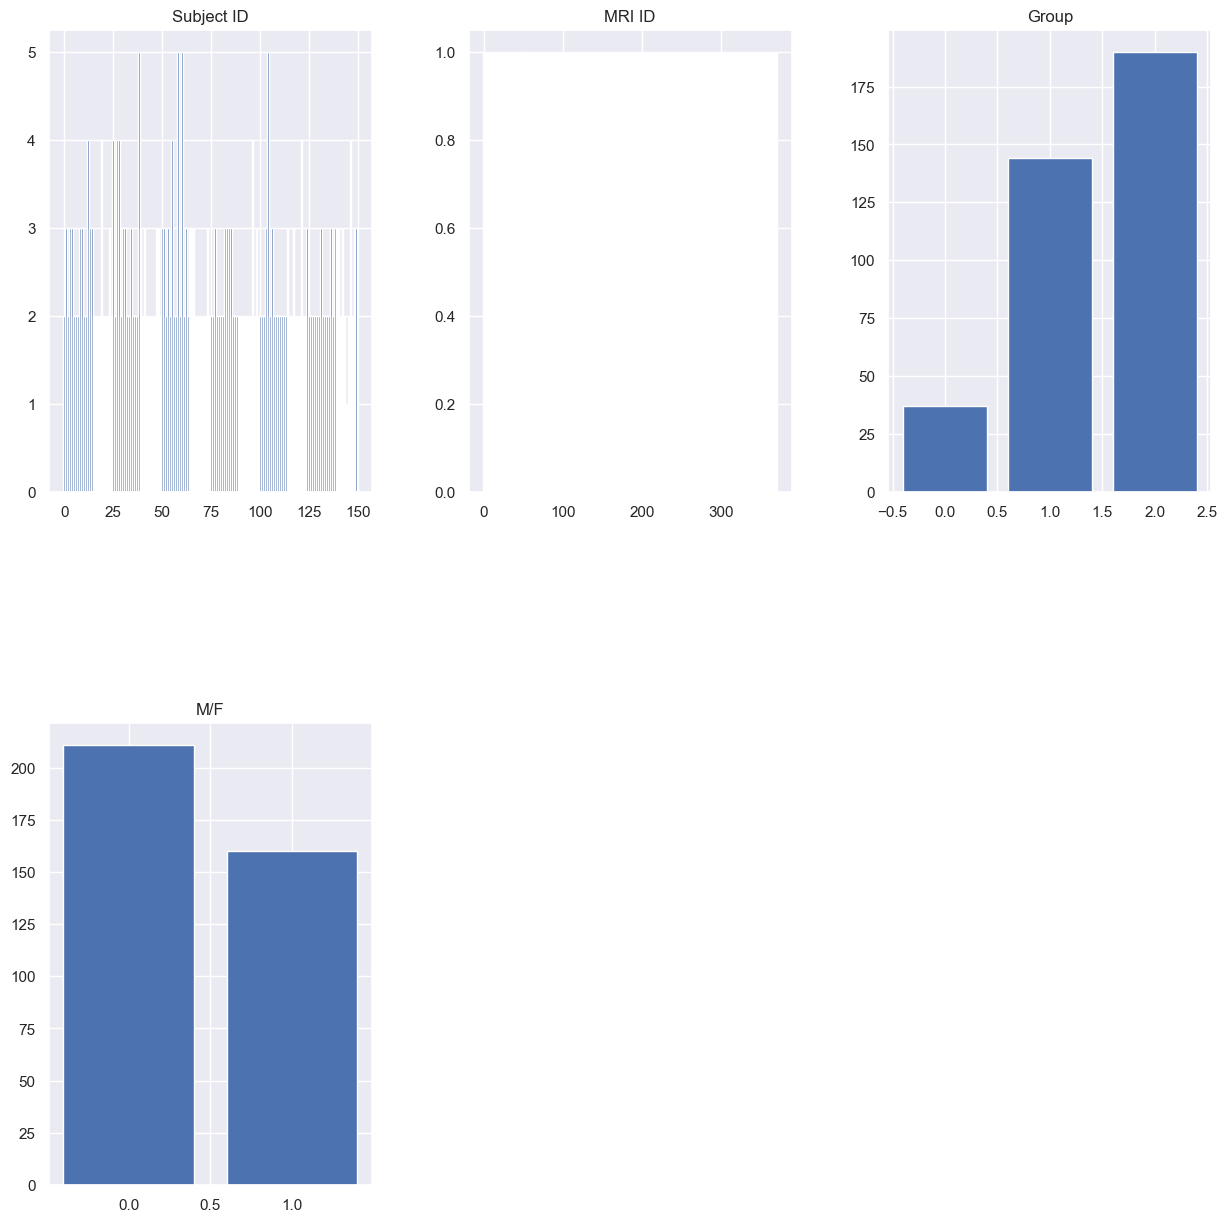

In [112]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

k = 0
for feature in df_tmp.loc[:, df_tmp.columns.isin(['Subject ID', 'MRI ID', 'Group', 'M/F'])]:
    ax = fig.add_subplot(2, 3, k+1)
    k = k+1
    
    count_per_title = df_tmp.groupby(feature).count().loc[:, 'Age'].values
    title_name = df_tmp.groupby(feature).count().index.values
    plt.bar(title_name, count_per_title)
    plt.title(feature)
plt.show()

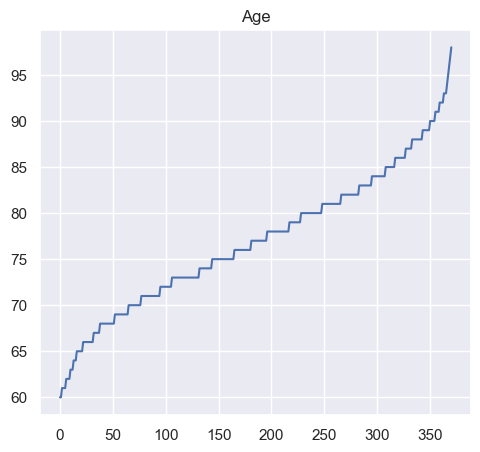

In [113]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.8, wspace=0.3)

k = 0
for feature in df_tmp.loc[:, df_tmp.columns.isin(['Age'])]:
    ax = fig.add_subplot(1, 3, k+1)
    k = k+1
    
    sorted_feature = df_tmp.sort_values(by=[feature])[feature].values
    f_range = [x for x in range(len(df_tmp[feature]))]

    plt.plot(f_range, sorted_feature)
    plt.title(feature)
plt.show()

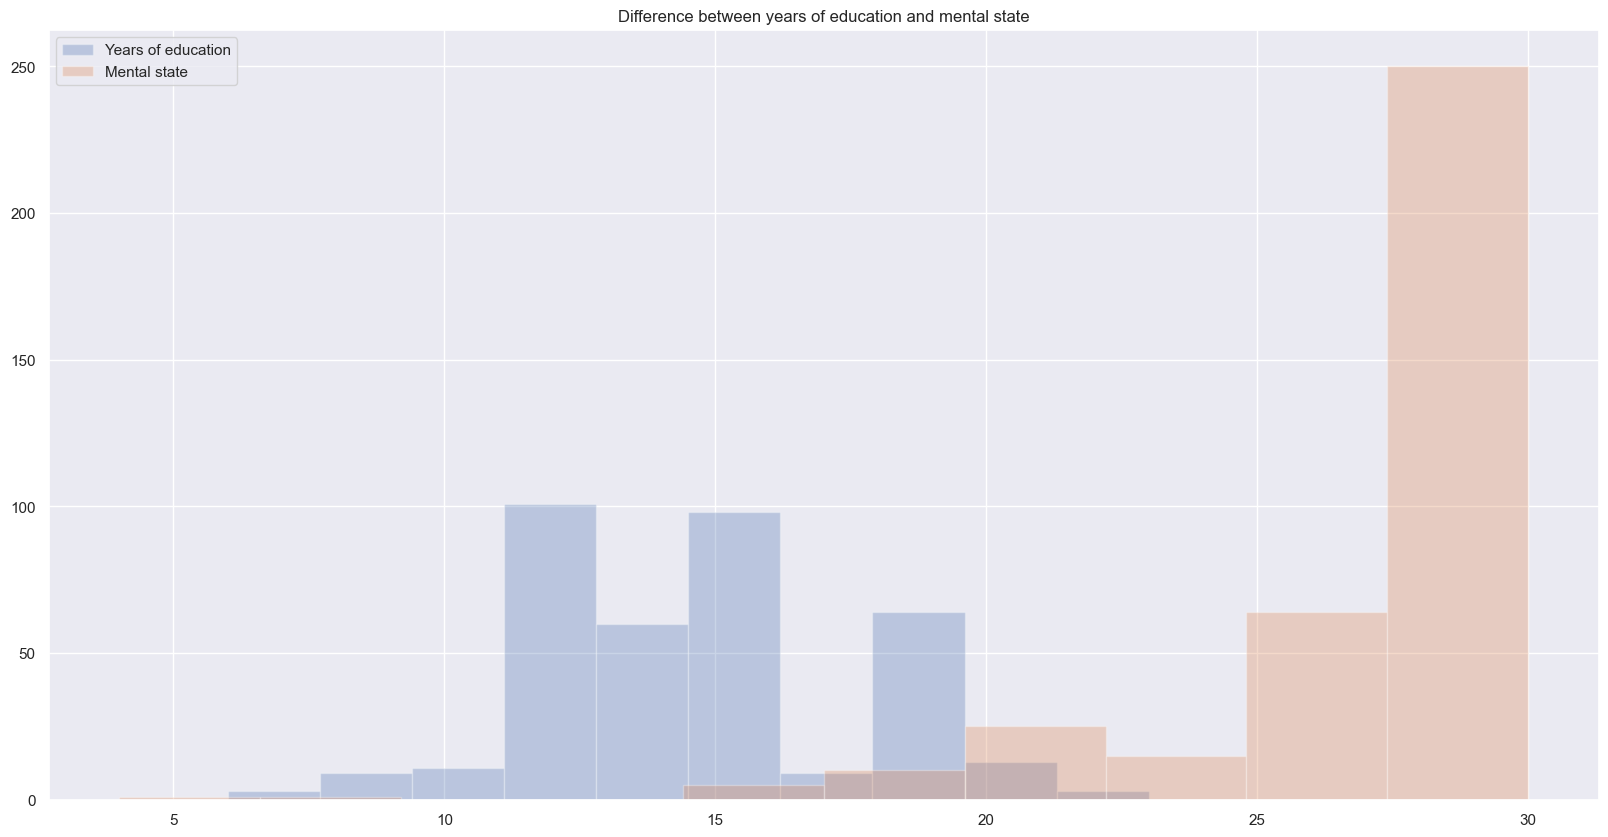

In [114]:
plt.hist(df_tmp['EDUC'], label='Years of education', alpha=0.3)
plt.hist(df_tmp['MMSE'], label='Mental state', alpha=0.3)
plt.title('Difference between years of education and mental state')
plt.legend(loc='best')
plt.show()

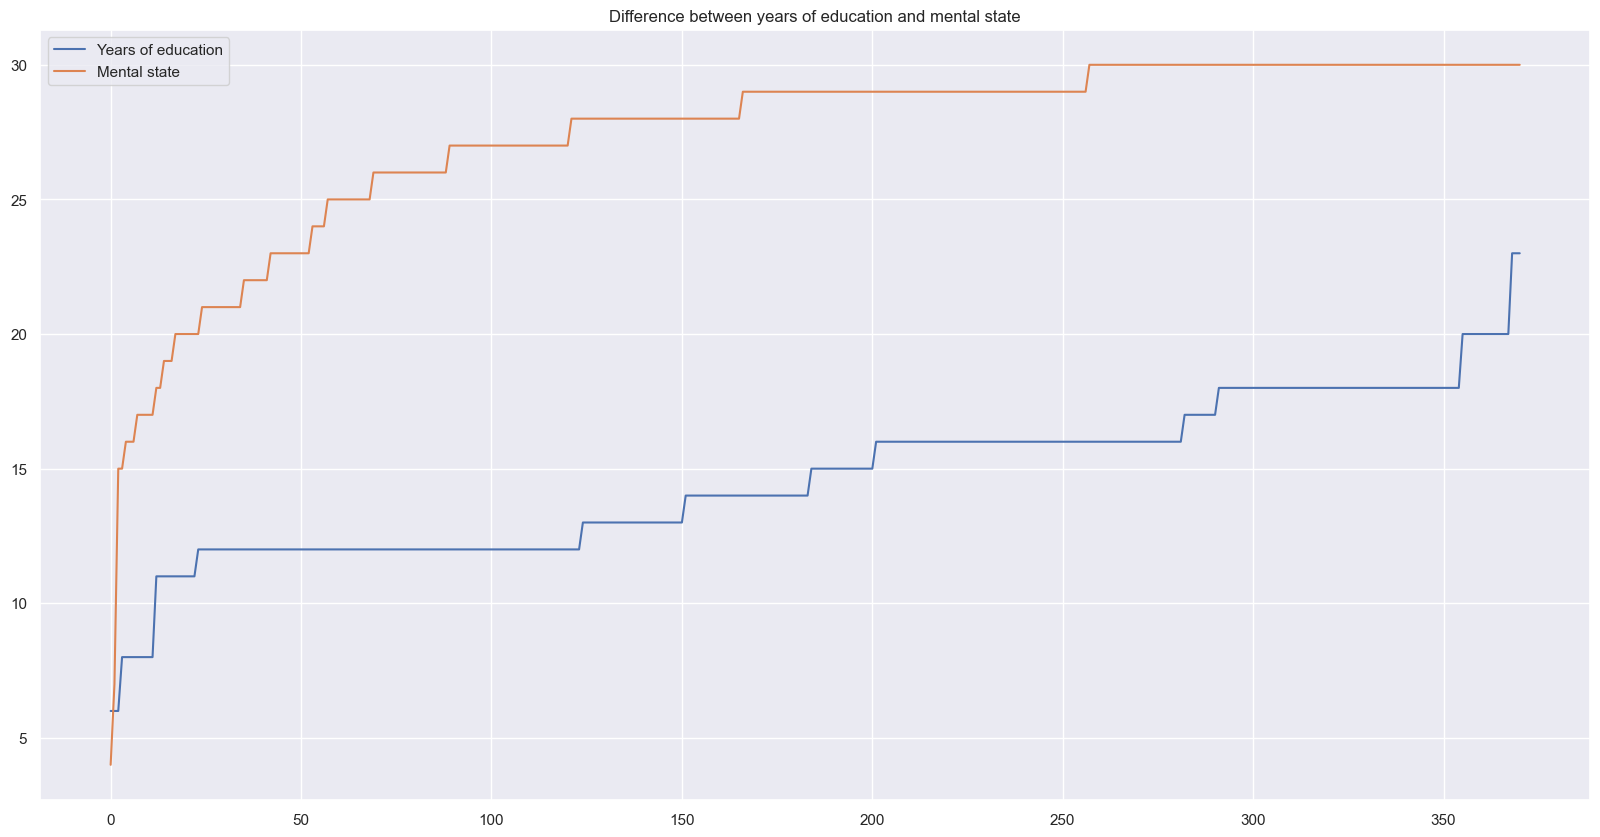

In [115]:
initial_w = df_tmp.sort_values(by=['EDUC'])['EDUC'].values
final_w = df_tmp.sort_values(by=['MMSE'])['MMSE'].values
initial = [x for x in range(len(df_tmp['EDUC']))]
final = [x for x in range(len(df_tmp['MMSE']))]

plt.plot(initial, initial_w, label='Years of education')
plt.plot(final, final_w, label='Mental state')
plt.title('Difference between years of education and mental state')
plt.legend(loc='best')
plt.show()

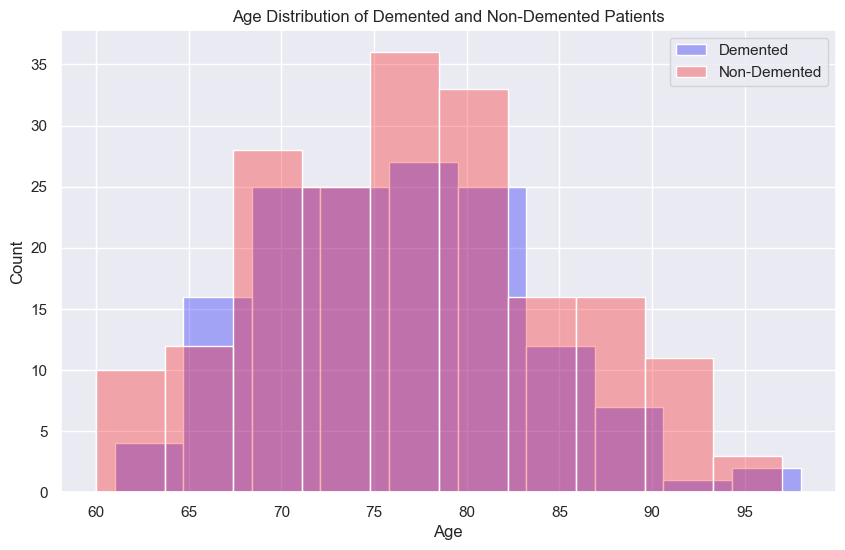

In [116]:
demented_data = df_tmp[df_tmp["Group"] == 1].astype(int)
nondemented_data = df_tmp[df_tmp["Group"] == 2].astype(int)


plt.figure(figsize=(10, 6))
sns.histplot(demented_data["Age"], color="blue", label="Demented", alpha = 0.3)
sns.histplot(nondemented_data["Age"], color="red", label="Non-Demented", alpha = 0.3)

plt.title("Age Distribution of Demented and Non-Demented Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


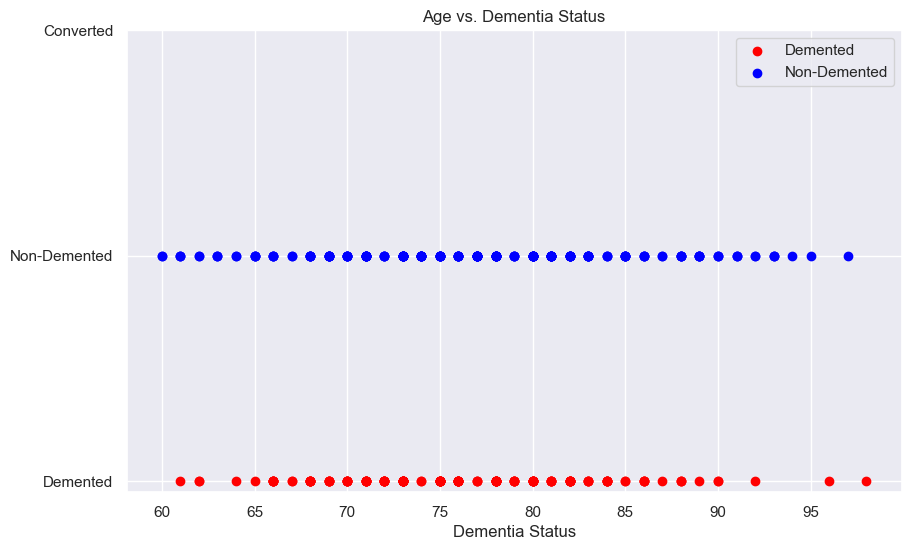

In [117]:
plt.figure(figsize=(10, 6))


# Scatter plot for demented patients
plt.scatter(demented_data["Age"], demented_data["Group"], color="red", label="Demented", marker="o")

# Scatter plot for non-demented patients
plt.scatter(nondemented_data["Age"], nondemented_data["Group"], color="blue", label="Non-Demented", marker="o")

plt.yticks([1, 2, 3], ["Demented", "Non-Demented", "Converted"])
plt.title("Age vs. Dementia Status")
plt.xlabel("Dementia Status")
plt.legend()
plt.show()

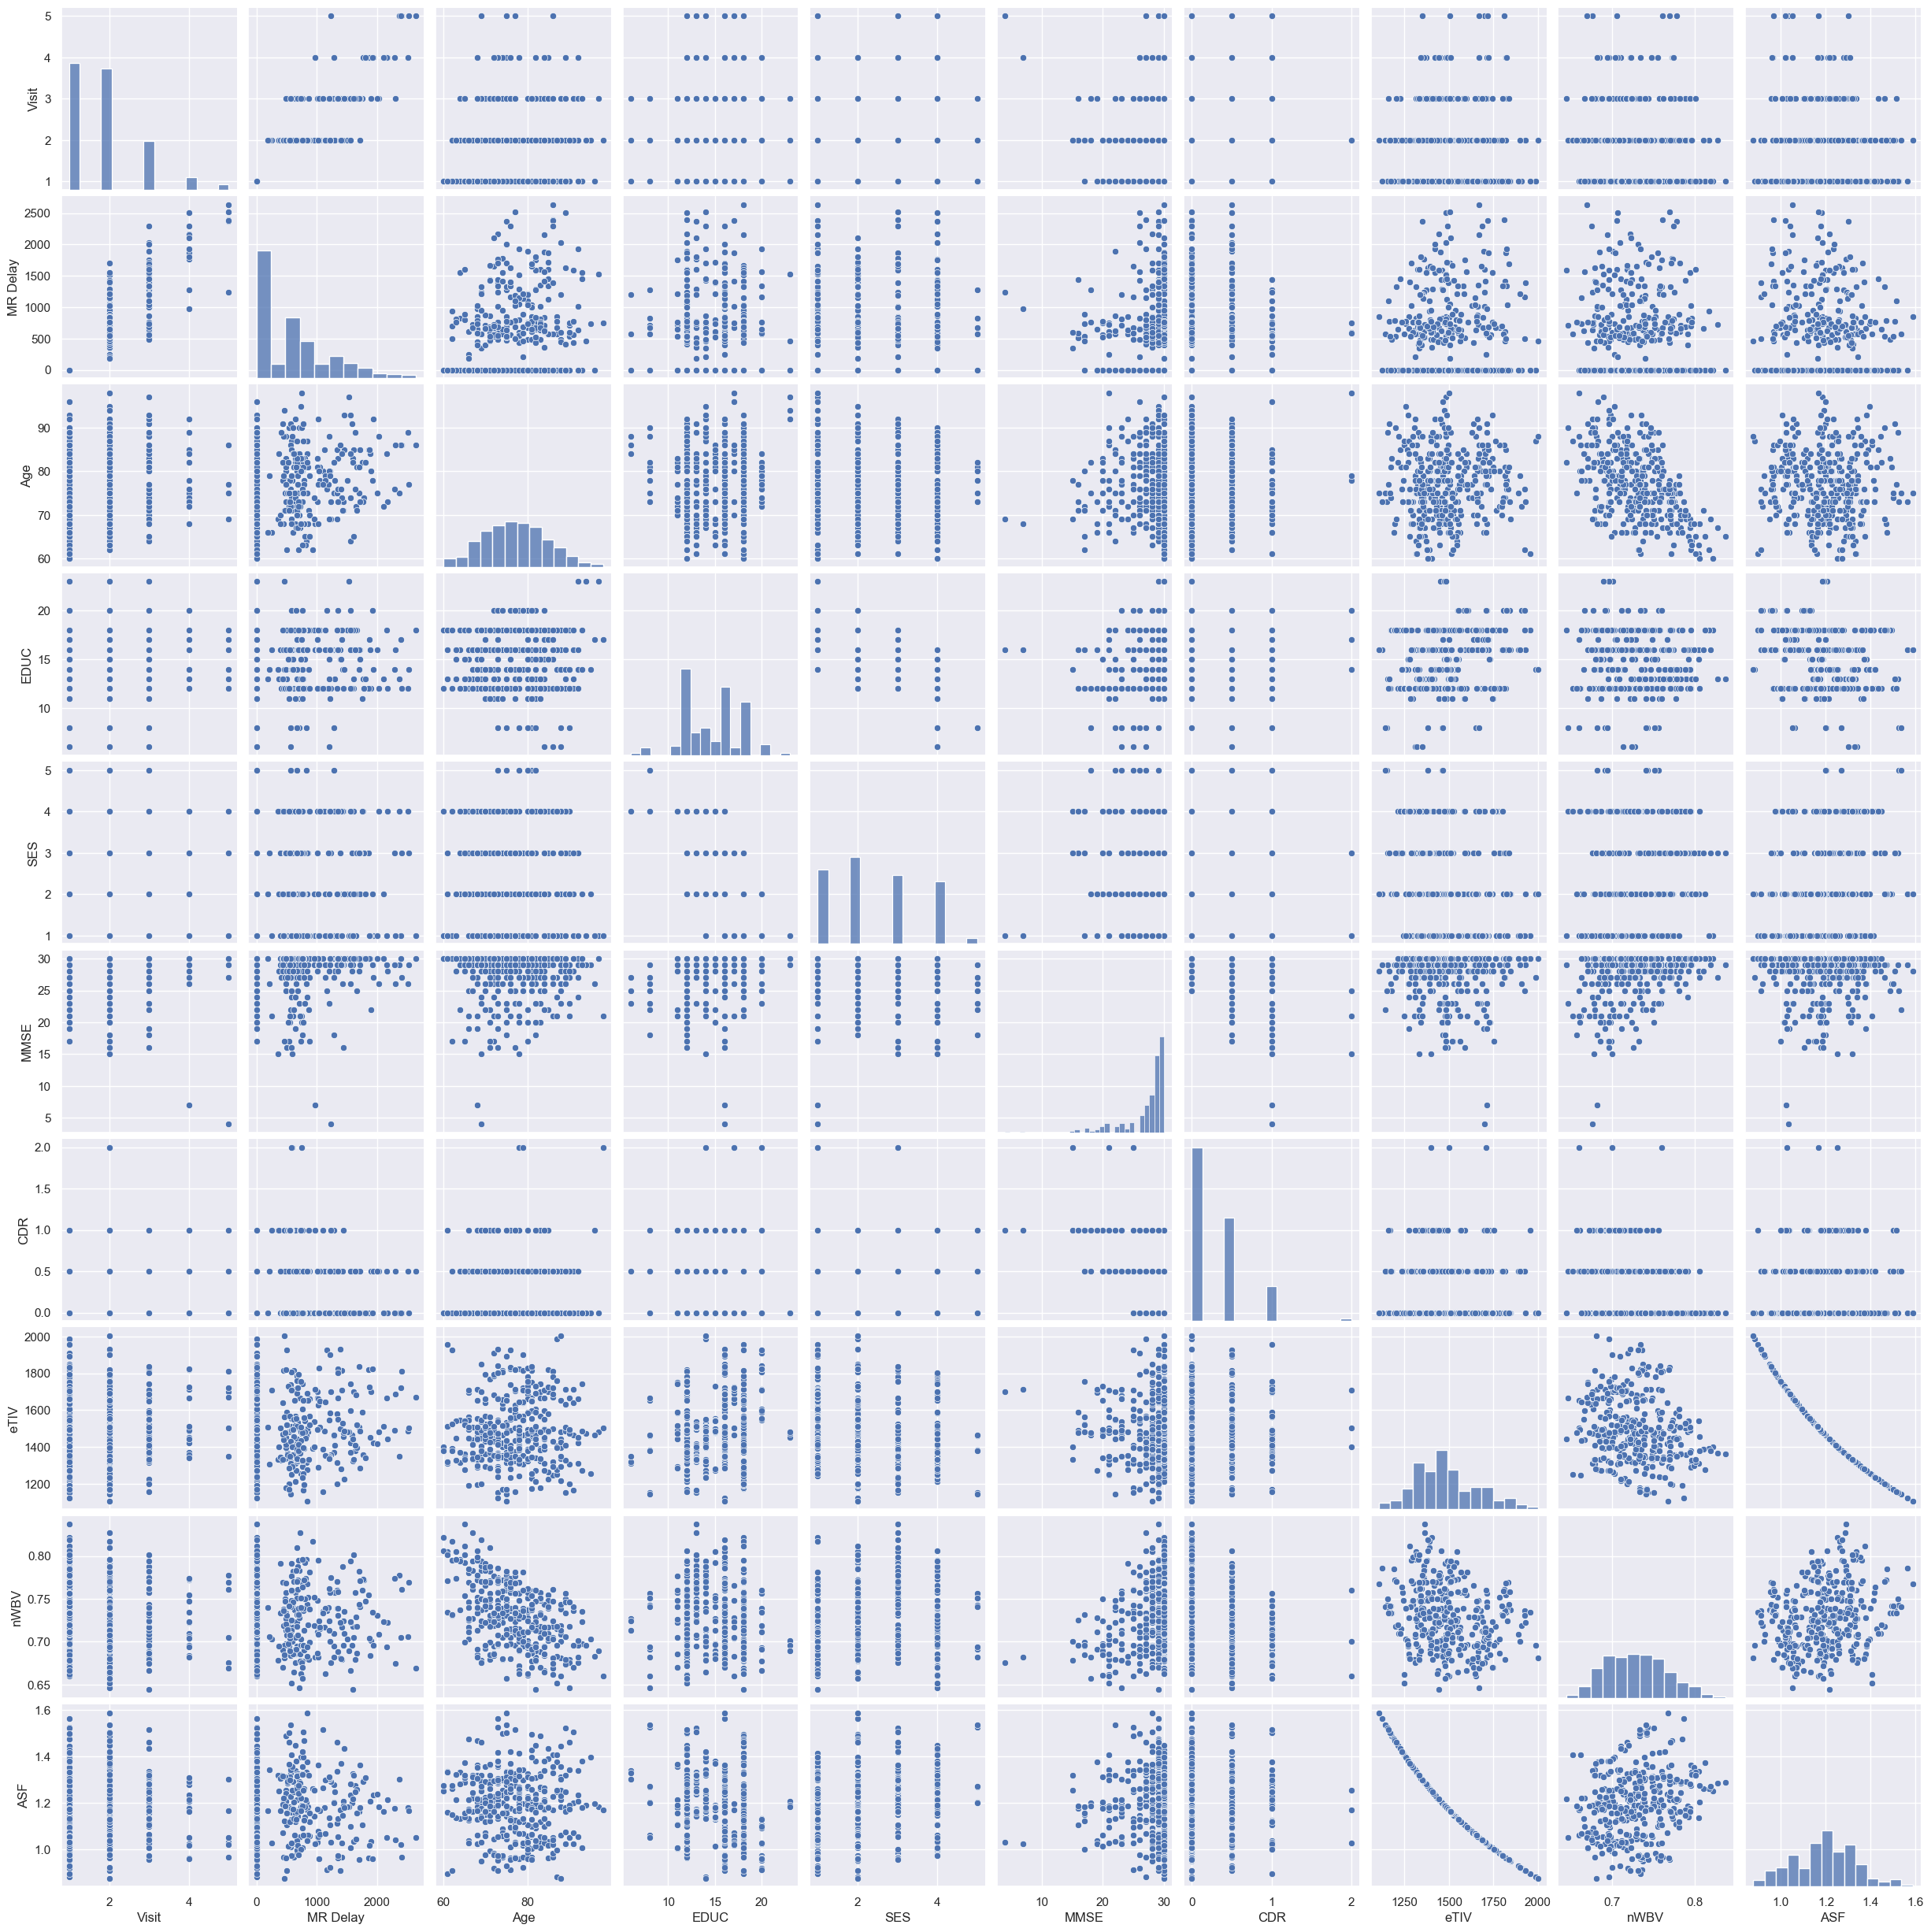

In [118]:
sns.set(rc={'figure.figsize':(55,45)})
sns.pairplot(df)
plt.show()

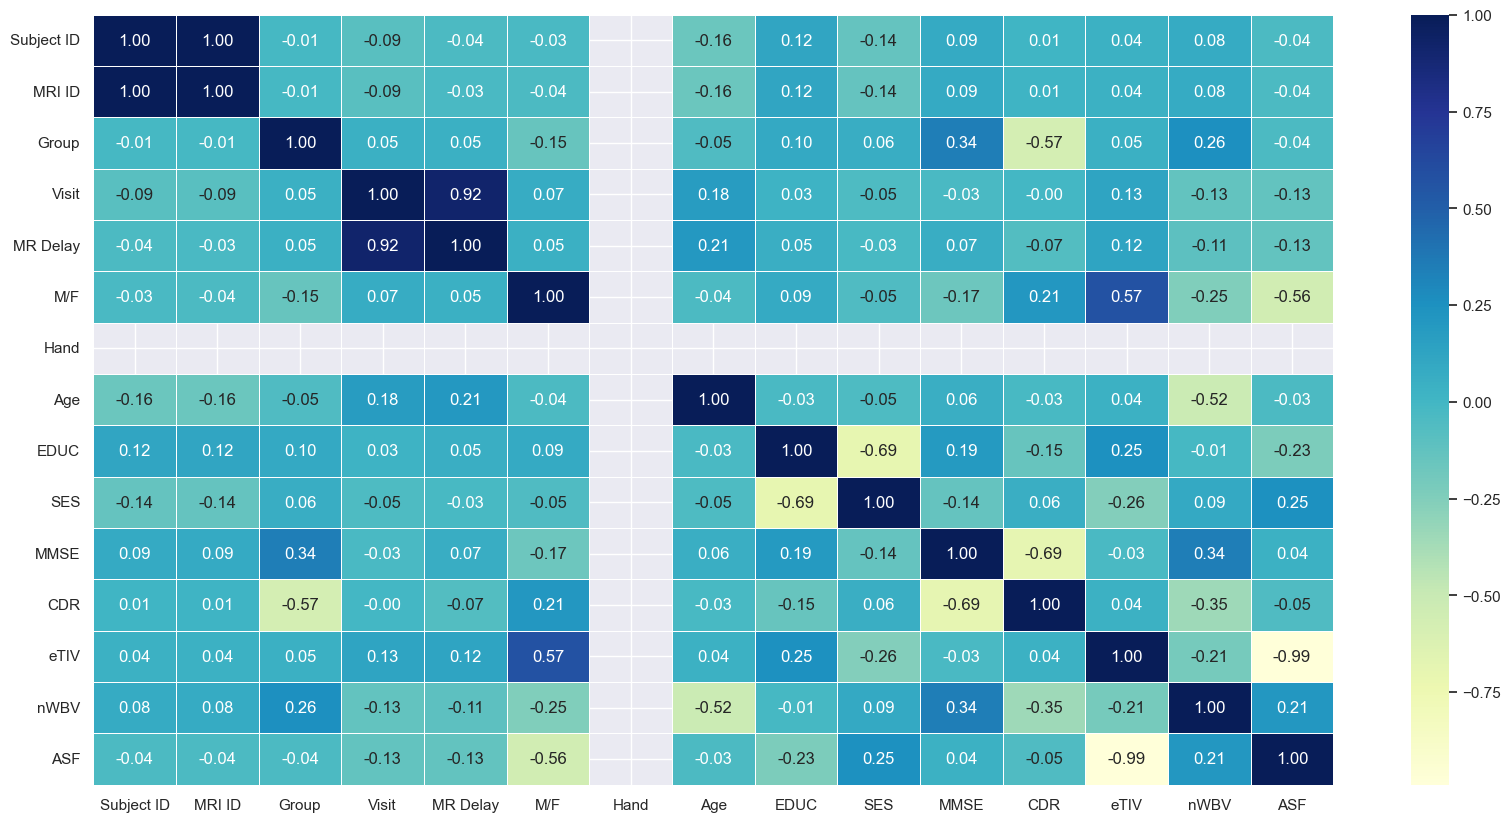

In [119]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_tmp.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

# Replikacija rezultata # 

Korištene značajke u replikaciji rezultata su: M.F, Age, EDUC, SES, MMSE, eTIV, nWBV, ASF, CDR.
Modeli strojnog učenja koji su korišteni u članku su: stablo odlučivanja (BT), nasumična šuma (RF), potporni vektori (SVM), XGBoost i glasovanje. 

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, GridSearchCV


ODABIR PODATAKA

In [121]:
selected_columns = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR']
# CDR = 0.5 -> dementan pacijent, CDR = 0.0 -> nedementant pacijent
first_visit_data = df_tmp.sort_values(by=['Subject ID', 'Visit']).groupby('Subject ID').head(1)  #uzimamo samo prvi visit pacijenta
first_visit_data['CDR'] = first_visit_data['CDR'].replace({0.5: 1})  #sada imamo samo dvije klase
selected_data = first_visit_data[selected_columns]

print(selected_data)

    M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF  CDR
0     1   87    14  2.0  27.0  1987  0.696  0.883  0.0
2     1   75    12  2.0  23.0  1678  0.736  1.046  1.0
5     0   88    18  3.0  28.0  1215  0.710  1.444  0.0
7     1   80    12  4.0  28.0  1689  0.712  1.039  0.0
10    1   71    16  2.0  28.0  1357  0.748  1.293  1.0
..   ..  ...   ...  ...   ...   ...    ...    ...  ...
359   1   73    12  2.0  23.0  1661  0.698  1.056  1.0
361   0   66    13  2.0  30.0  1495  0.746  1.174  0.0
365   0   72    16  3.0  24.0  1354  0.733  1.296  1.0
367   1   80    16  1.0  28.0  1704  0.711  1.030  1.0
370   0   61    13  2.0  30.0  1319  0.801  1.331  0.0

[150 rows x 9 columns]


TRENIRANJE

In [122]:
X = selected_data.drop('CDR', axis=1).reset_index(drop=True)
X = pd.DataFrame(X.values, columns=None)
y = selected_data['CDR']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


RandomForest Classifier

In [123]:
def cross_check_RF(X_train, X_test, y_train, y_test):
    train_error = []
    test_error = []
    best = 1
    best_depth = 0
    for depth in range(1, 16):
        model_random_forest = RandomForestClassifier(max_depth=depth).fit(X_train, y_train.reshape(1, -1).flatten())
        train_err = 1-accuracy_score(y_train.reshape(1, -1).flatten(), model_random_forest.predict(X_train))
        test_err = 1-accuracy_score(y_test.reshape(1, -1).flatten(), model_random_forest.predict(X_test))
        train_error.append(train_err)
        test_error.append(test_err)
        
        if test_err < best:
            best_depth = depth
        
    return train_error, test_error, best_depth

15


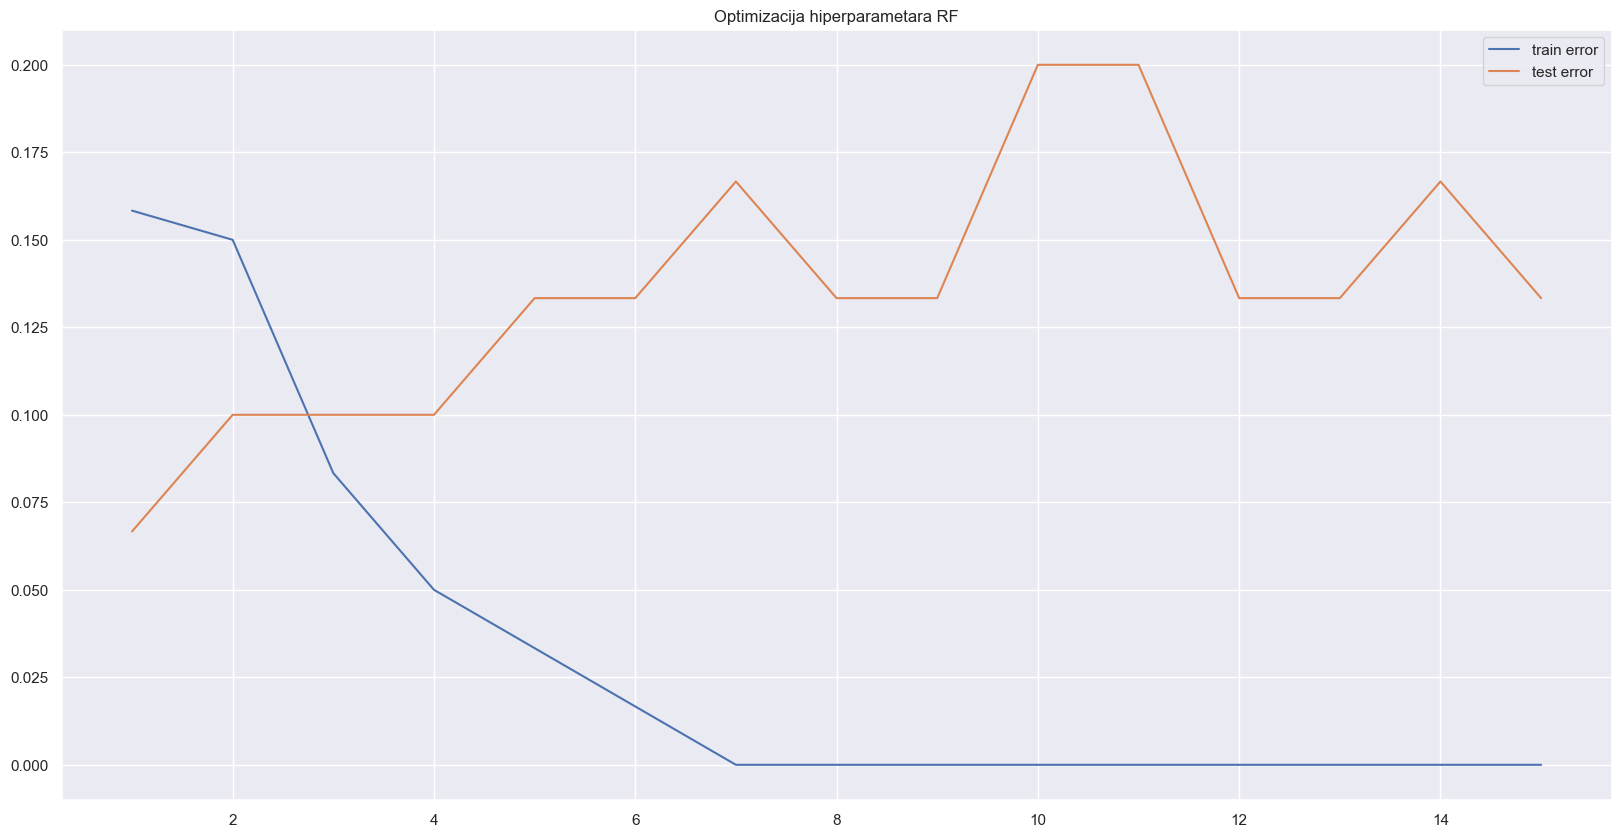

In [124]:
train_err, test_err, best_depth = cross_check_RF(X_train, X_test, y_train, y_test)
print(best_depth)

plt.plot(range(1, 16), train_err, label=f'train error')
plt.plot(range(1, 16), test_err, label=f'test error')
plt.title("Optimizacija hiperparametara RF")
plt.legend(loc = 'best')

Za Random Forest Classifier provedena je optimizacija hiperparametara dubine gdje je dobivena optimalna dubina (best_depth)

In [125]:
def train_rand_forest(X_train, X_test, y_train, y_test, max_depth=None, num_of_classes=2):
    
    model = RandomForestClassifier(max_depth=max_depth).fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (Random Forest): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'accuracy: {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'confusion matrix:\n{conf_matrix}\n')
    
    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()
        

Cross-Validation Accuracy (Random Forest): 0.8533333333333333
accuracy: 0.8333333333333334
confusion matrix:
[[17  5]
 [ 0  8]]



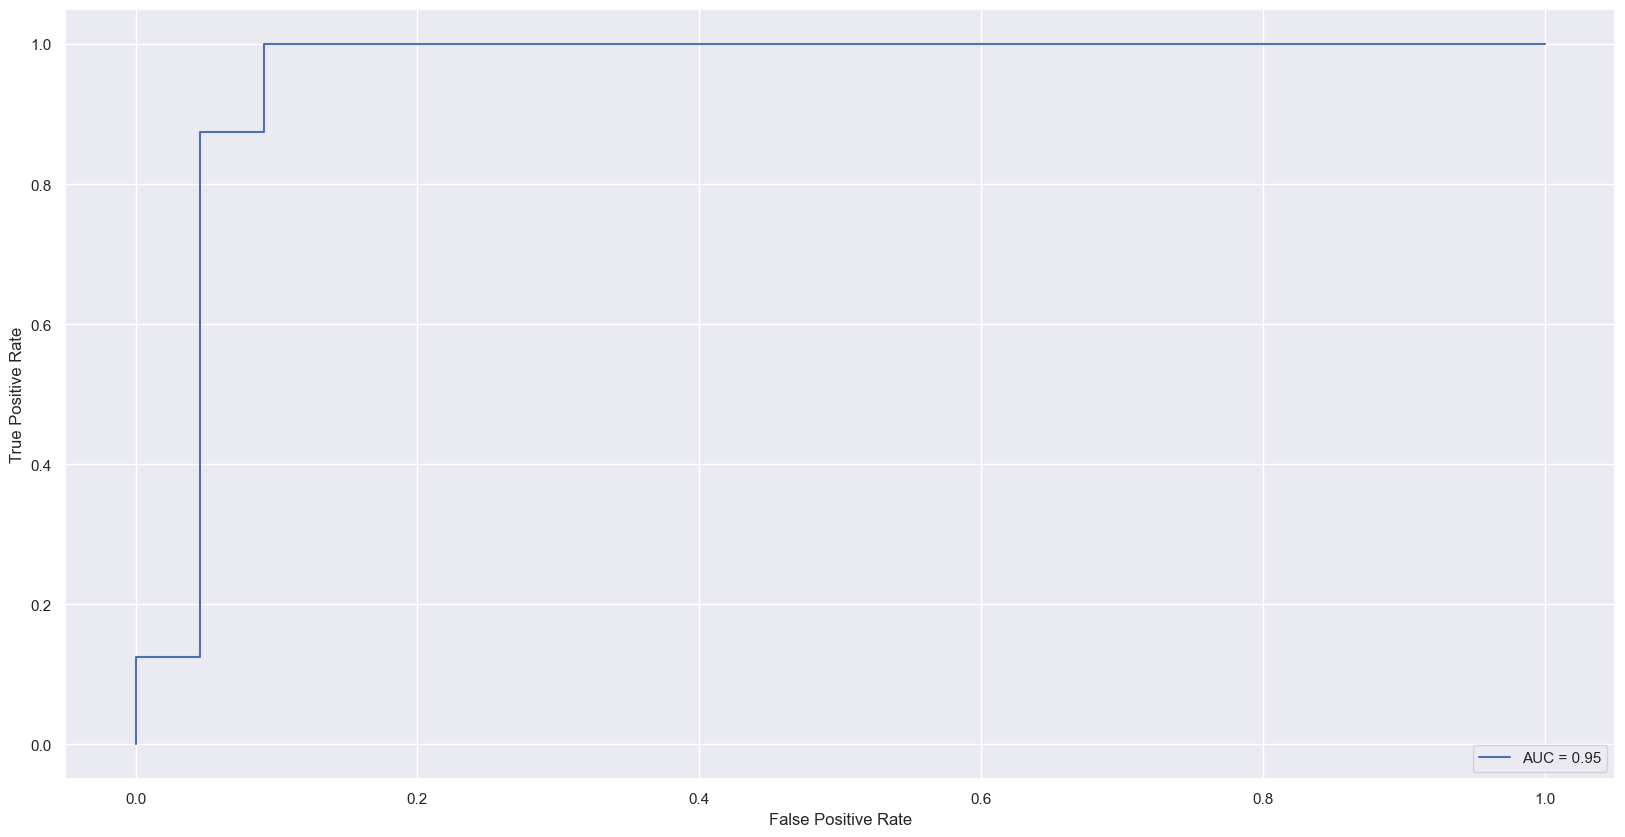

In [126]:
train_rand_forest(X_train, X_test, y_train.ravel(), y_test, max_depth=best_depth)

Supported Vector Machine

In [127]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


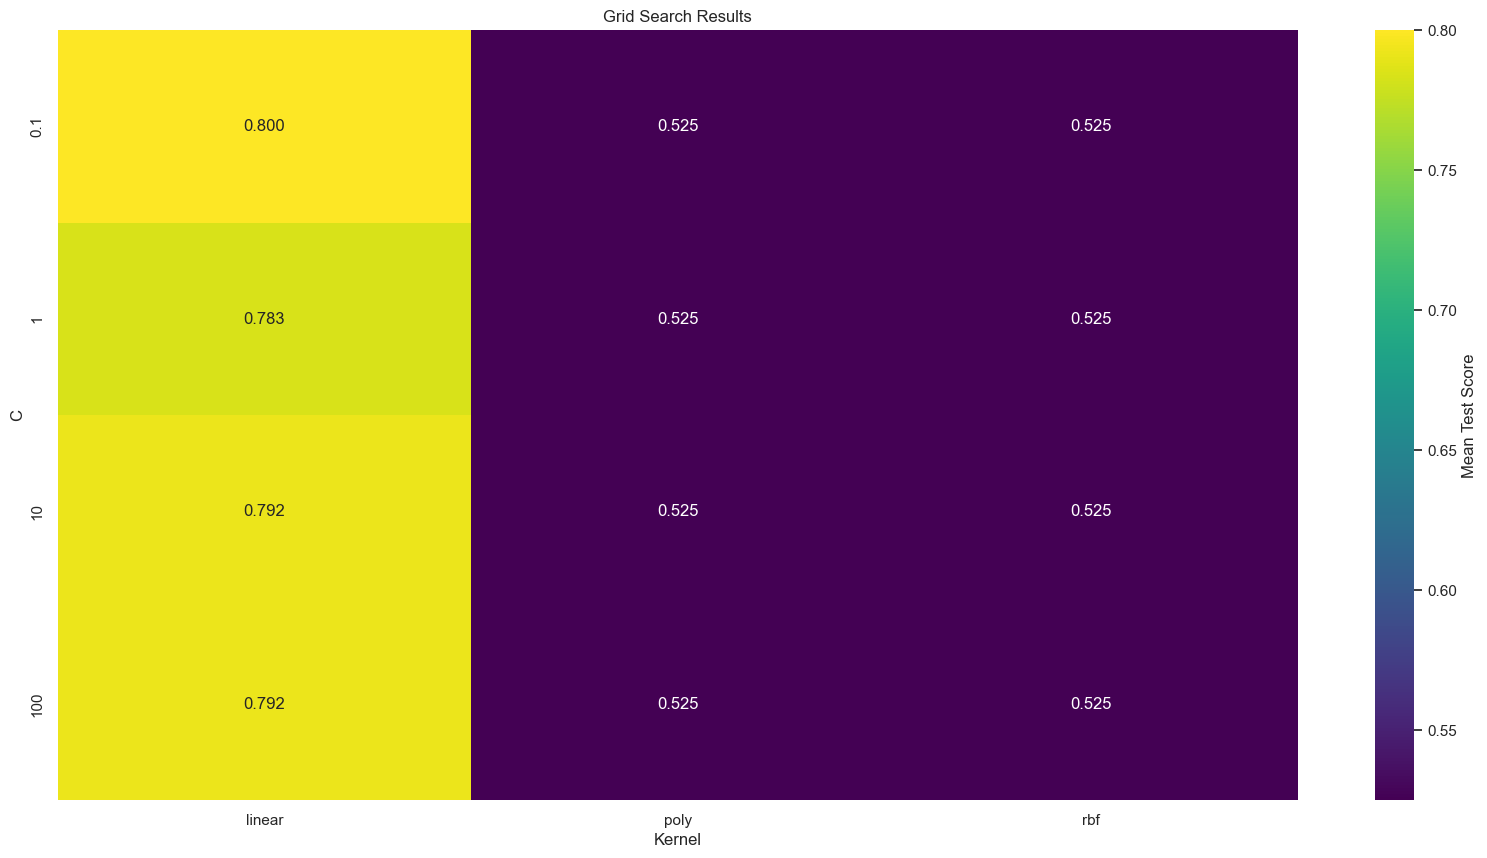

In [128]:
results = pd.DataFrame(grid_search.cv_results_)

# Visualizing grid search results using a heatmap
heatmap_data = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'})
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Grid Search Results')
plt.show()

In [129]:
best_C = best_params['C']
best_kernel = best_params['kernel']
print(best_kernel)

linear


In [130]:
def cross_check_SVM(X_train, X_test, y_train, y_test):
    train_error = []
    test_error = []
    best = 1
    best_depth = 0
    for depth in range(1, 16):
        model_random_forest = RandomForestClassifier(max_depth=depth).fit(X_train, y_train.reshape(1, -1).flatten())
        train_err = 1-accuracy_score(y_train.reshape(1, -1).flatten(), model_random_forest.predict(X_train))
        test_err = 1-accuracy_score(y_test.reshape(1, -1).flatten(), model_random_forest.predict(X_test))
        train_error.append(train_err)
        test_error.append(test_err)
        
        if test_err < best:
            best_depth = depth
        
    return train_error, test_error, best_depth

In [131]:
def train_svm(X_train, X_test, y_train, y_test, kernel=best_kernel, C=best_C, num_folds=10):
    model = SVC(kernel=kernel, C=C, probability=True).fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (SVM): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'Accuracy (SVM): {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'Confusion Matrix (SVM):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (SVM): 0.7999999999999999
Accuracy (SVM): 0.8666666666666667
Confusion Matrix (SVM):
[[18  4]
 [ 0  8]]



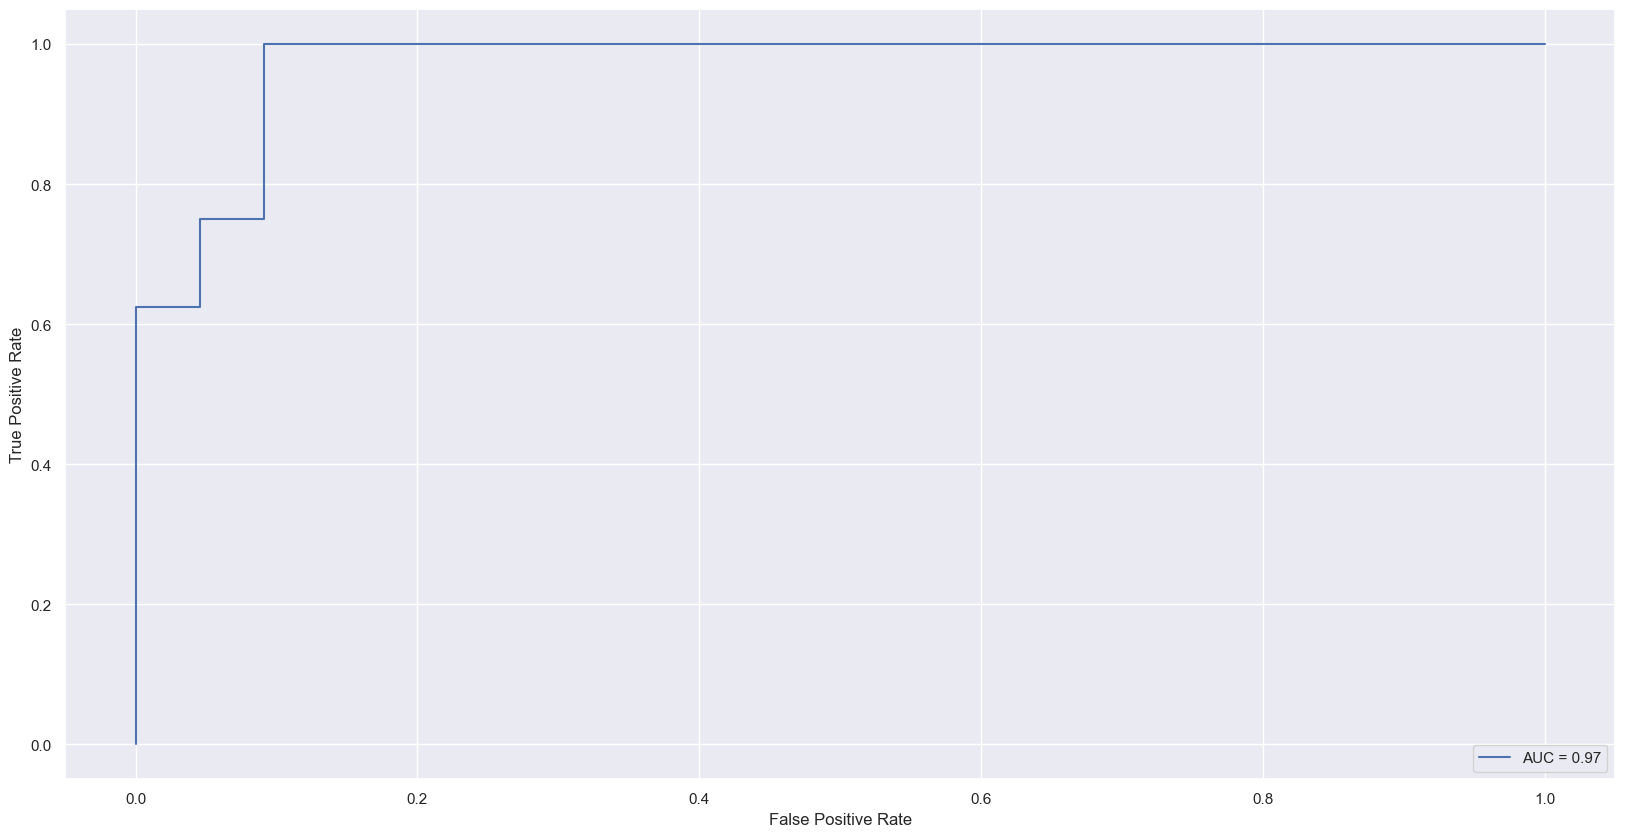

In [132]:
train_svm(X_train, X_test, y_train, y_test)

XGBoost classifier

In [133]:
def train_xgboost(X_train, X_test, y_train, y_test, num_folds=10):
    model = XGBClassifier().fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (XGBoost): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'Accuracy (XGBoost): {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'Confusion Matrix (XGBoost):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (XGBoost): 0.8166666666666667
Accuracy (XGBoost): 0.8666666666666667
Confusion Matrix (XGBoost):
[[18  4]
 [ 0  8]]



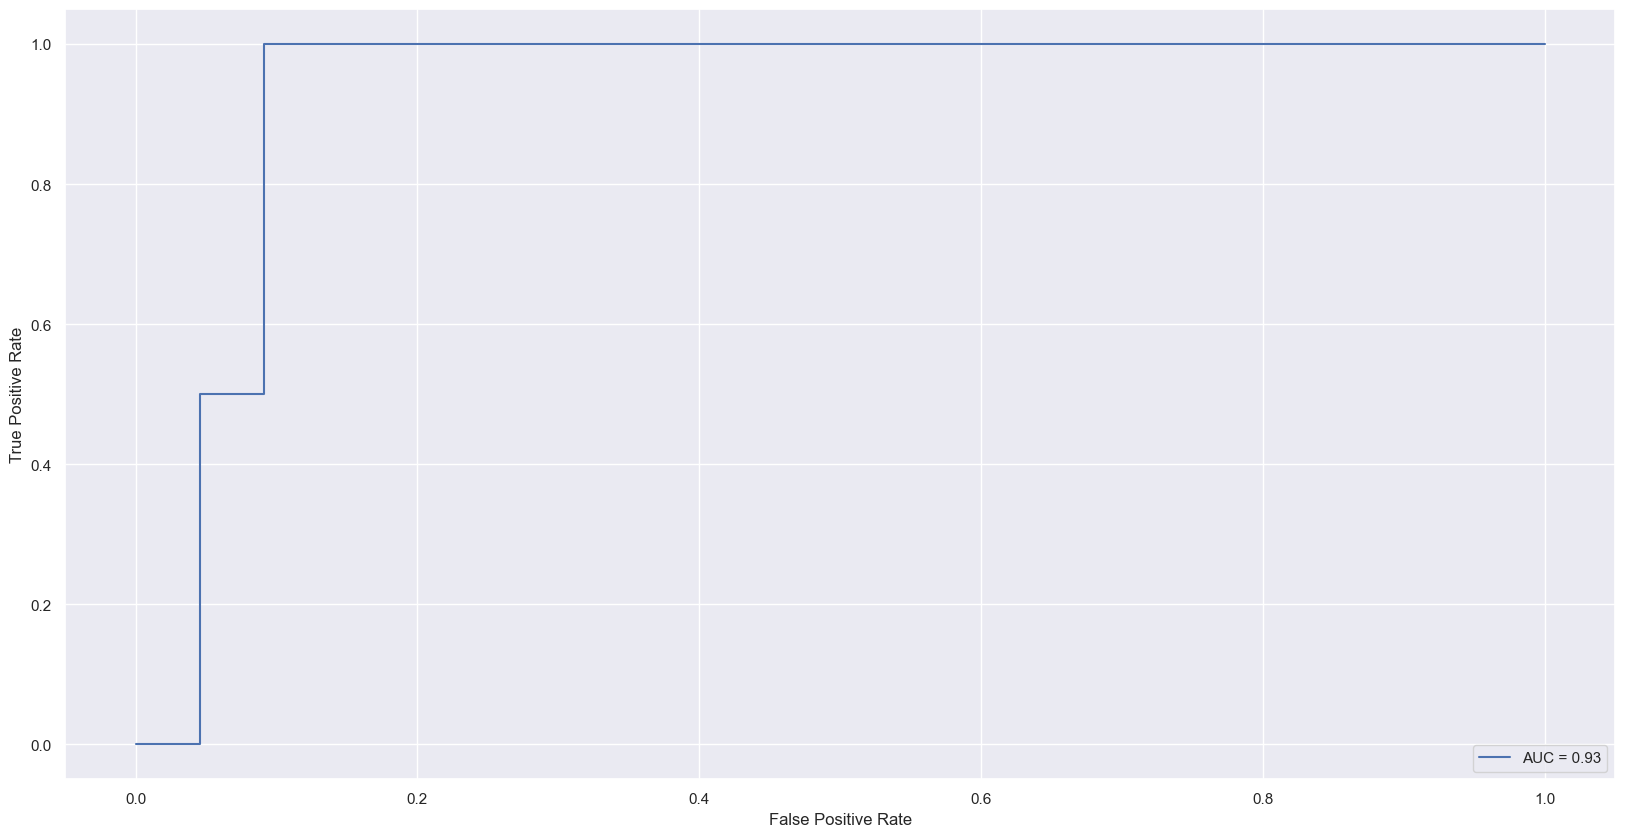

In [134]:
train_xgboost(X_train, X_test, y_train, y_test)

Decision tree classifier

In [135]:
def cross_check_DT(X_train, X_test, y_train, y_test):
    train_error = []
    test_error = []
    best = 1
    best_depth = 0
    for depth in range(1, 16):
        model_random_DT = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
        train_err = 1-accuracy_score(y_train, model_random_DT.predict(X_train))
        test_err = 1-accuracy_score(y_test, model_random_DT.predict(X_test))
        train_error.append(train_err)
        test_error.append(test_err)
        
        if test_err < best:
            best_depth = depth
        
    return train_error, test_error, best_depth

15


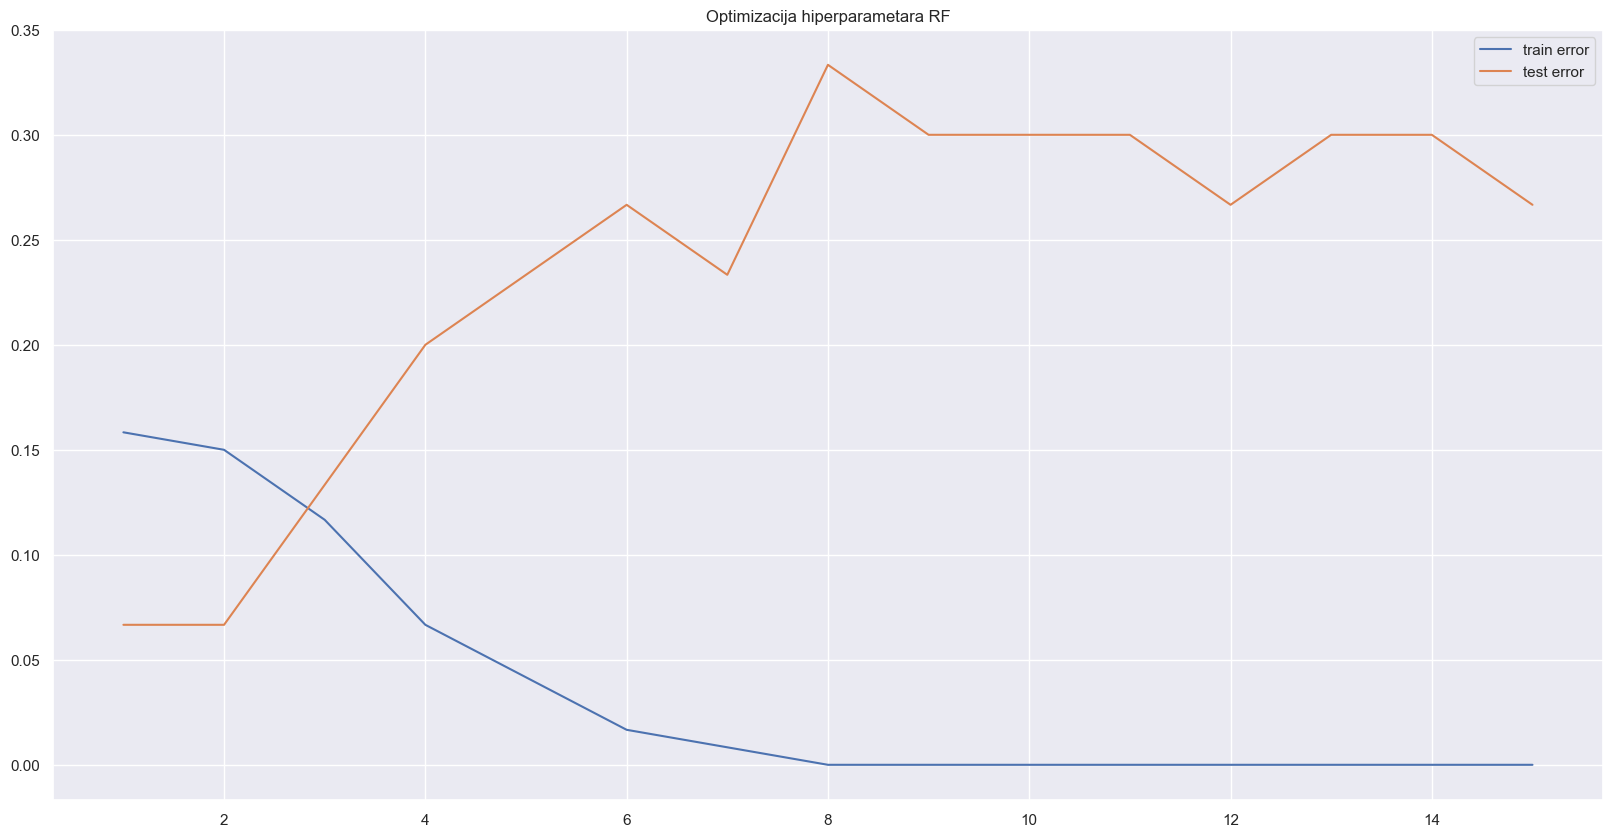

In [136]:
train_err, test_err, best_depth = cross_check_DT(X_train, X_test, y_train, y_test)
print(best_depth)

plt.plot(range(1, 16), train_err, label=f'train error')
plt.plot(range(1, 16), test_err, label=f'test error')
plt.title("Optimizacija hiperparametara RF")
plt.legend(loc = 'best')

In [137]:
def train_decision_tree(X_train, X_test, y_train, y_test, max_depth=None, num_folds=10):
    model = DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (Decision Tree): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, model.predict(X_test))
    print(f'Accuracy (Decision Tree): {acc}')

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print(f'Confusion Matrix (Decision Tree):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (Decision Tree): 0.7833333333333334
Accuracy (Decision Tree): 0.7
Confusion Matrix (Decision Tree):
[[13  9]
 [ 0  8]]



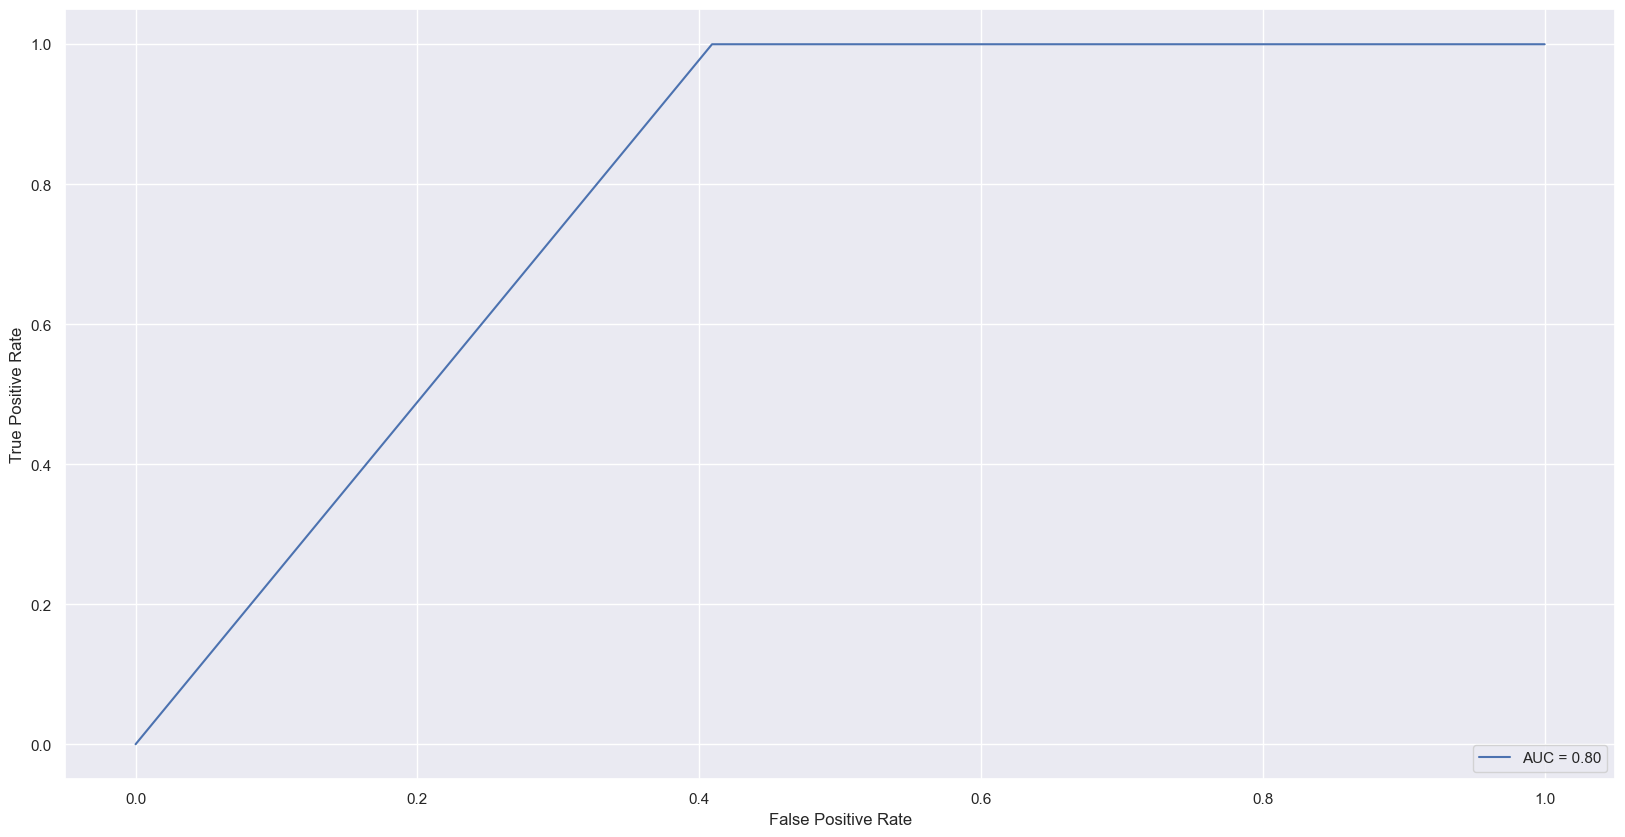

In [138]:
train_decision_tree(X_train, X_test, y_train, y_test)

Voting classifier

In [139]:
def train_voting(X_train, X_test, y_train, y_test, num_folds=10):
    rf_model = RandomForestClassifier(max_depth=10)
    svm_model = SVC(kernel=best_kernel, C=best_C, probability=True)
    xgb_model = XGBClassifier()
    df_model = DecisionTreeClassifier()

    voting_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('svm', svm_model),
        ('xgb', xgb_model),
        ('df', df_model )
    ], voting='soft').fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Cross-validation
    cv_results = cross_val_score(voting_model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy (Voting): {np.mean(cv_results)}')

    acc = accuracy_score(y_test, voting_model.predict(X_test))
    print(f'Accuracy (Voting): {acc}')

    conf_matrix = confusion_matrix(y_test, voting_model.predict(X_test))
    print(f'Confusion Matrix (Voting):\n{conf_matrix}\n')

    # ROC Curve for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, voting_model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        display.plot()
        plt.show()

Cross-Validation Accuracy (Voting): 0.825
Accuracy (Voting): 0.8
Confusion Matrix (Voting):
[[16  6]
 [ 0  8]]



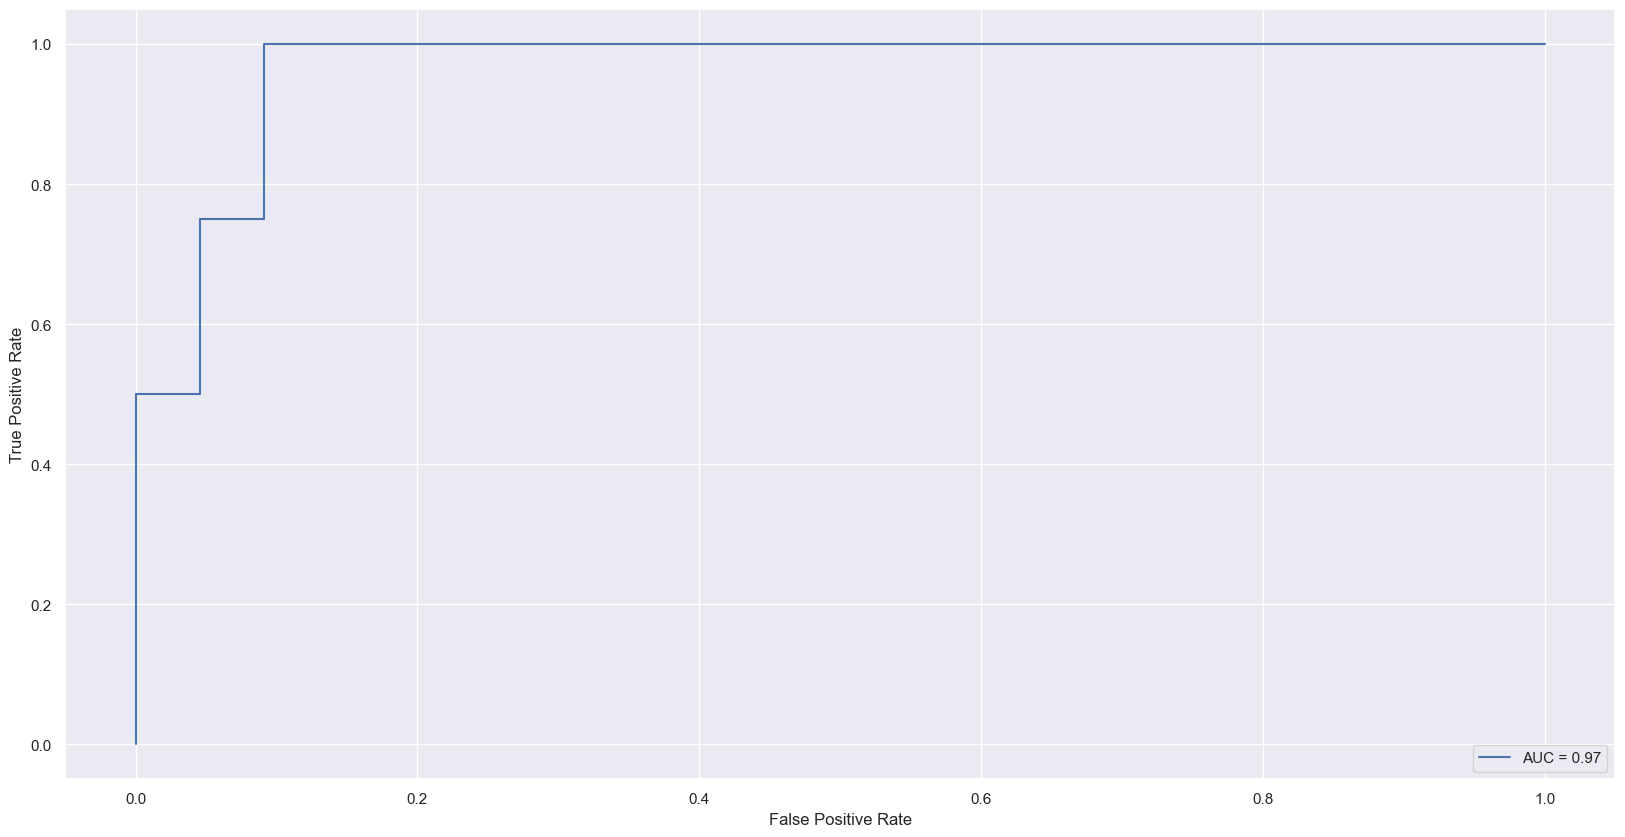

In [140]:
train_voting(X_train, X_test, y_train, y_test)

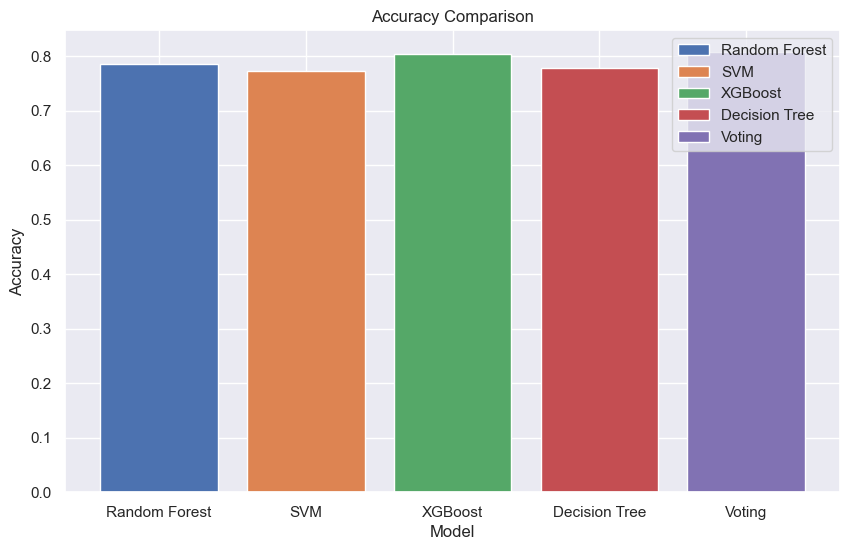

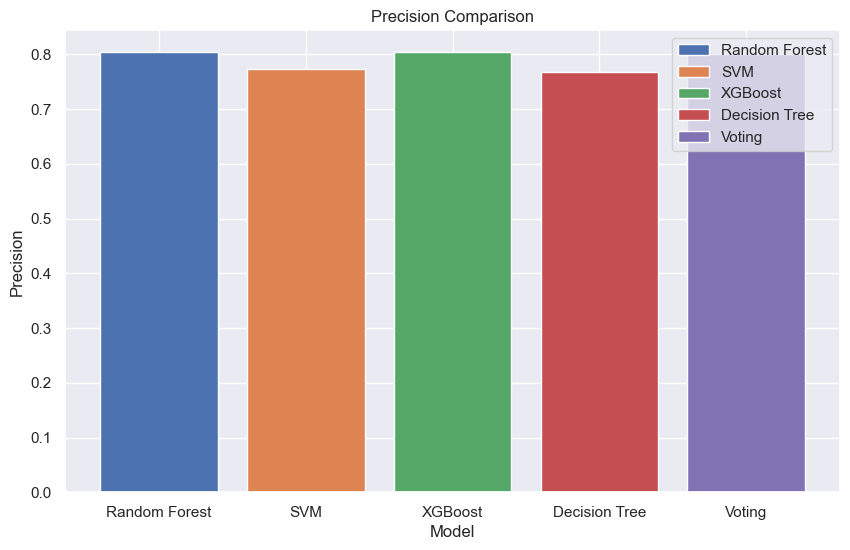

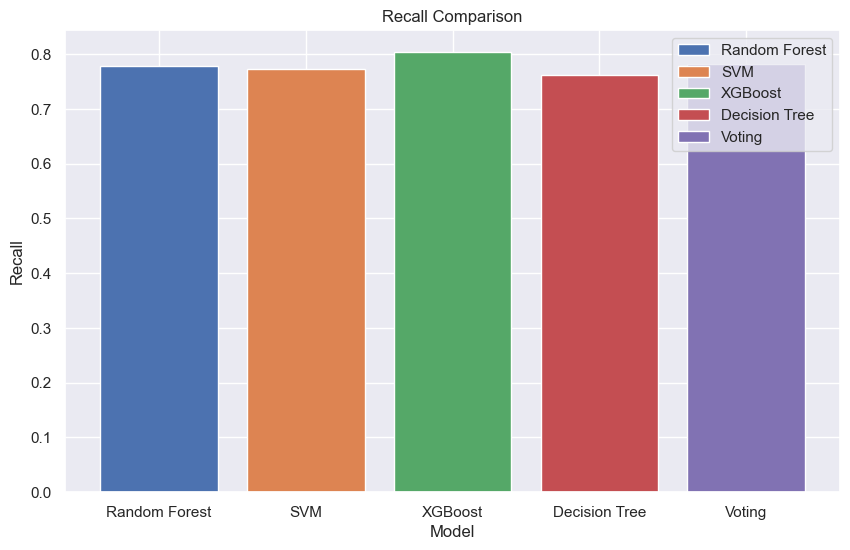

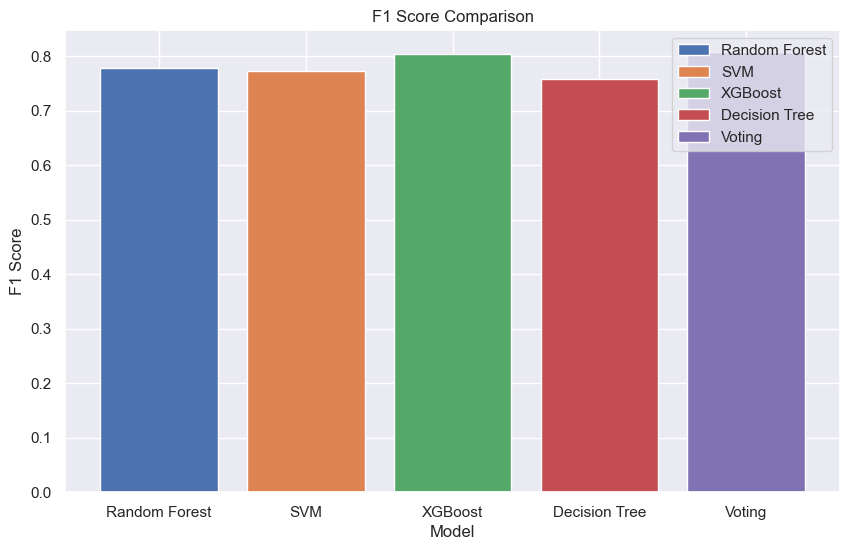

In [141]:
def calculate_metrics(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return accuracy, precision, recall, f1

def train_and_evaluate(model, X, y, num_folds=10):
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Cross-validation
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Calculate metrics
    accuracy, precision, recall, f1 = calculate_metrics(y, y_pred)

    return accuracy, precision, recall, f1

rf_model = RandomForestClassifier(max_depth=10)
svm_model = SVC(kernel=best_kernel, C=best_C, probability=True)
xgb_model = XGBClassifier()
dt_model = DecisionTreeClassifier()


models = [
    ('Random Forest', RandomForestClassifier(max_depth=10)),
    ('SVM', SVC(kernel=best_kernel, C=best_C)),
    ('XGBoost', XGBClassifier()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10)),
    ('Voting', VotingClassifier(estimators=[
        ('rf', rf_model),
        ('svm', svm_model),
        ('xgb', xgb_model),
        ('dt', dt_model)
    ], voting='soft'))
]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric_name in metrics_names:
    plt.figure(figsize=(10, 6))
    plt.title(f'{metric_name} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric_name)

    for model_name, model in models:
        _, _, _, metric_value = train_and_evaluate(model, X_train, y_train)
        plt.bar(model_name, metric_value, label=model_name)

    plt.legend()
    plt.show()
